### Superconductivity Materials and Critical Temperature

Youyu Zhang

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import dataset

dataset = pd.read_csv('train.csv')

In [3]:
# Check basic info

dataset.describe()

# Critical temperature unit: K

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000
mean,4.115224,87.557631,72.988310,71.290627,58.539916,1.165608,1.063884,115.601251,33.225218,44.391893,...,3.153127,3.056536,3.055885,1.295682,1.052841,2.041010,1.483007,0.839342,0.673987,34.421219
std,1.439295,29.676497,33.490406,31.030272,36.651067,0.364930,0.401423,54.626887,26.967752,20.035430,...,1.191249,1.046257,1.174815,0.393155,0.380291,1.242345,0.978176,0.484676,0.455580,34.254362
min,1.000000,6.941000,6.423452,5.320573,1.960849,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000210
25%,3.000000,72.458076,52.143839,58.041225,35.248990,0.966676,0.775363,78.512902,16.824174,32.890369,...,2.116732,2.279705,2.091251,1.060857,0.775678,1.000000,0.921454,0.451754,0.306892,5.365000
50%,4.000000,84.922750,60.696571,66.361592,39.918385,1.199541,1.146783,122.906070,26.636008,45.123500,...,2.618182,2.615321,2.434057,1.368922,1.166532,2.000000,1.063077,0.800000,0.500000,20.000000
75%,5.000000,100.404410,86.103540,78.116681,73.113234,1.444537,1.359418,154.119320,38.356908,59.322812,...,4.026201,3.727919,3.914868,1.589027,1.330801,3.000000,1.918400,1.200000,1.020436,63.000000
max,9.000000,208.980400,208.980400,208.980400,208.980400,1.983797,1.958203,207.972460,205.589910,101.019700,...,7.000000,7.000000,7.000000,2.141963,1.949739,6.000000,6.992200,3.000000,3.000000,185.000000


In [4]:
dataset.shape

(21263, 82)

In [5]:
dataset.columns

Index(['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie',
       'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie',
       'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie',
       'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius', 'range_atomic_radius',
       'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius',
       'mean_Density', 'wtd_mean_Density', 'gmean_Density',
       'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density',
       'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density',
       'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity',
       'gmean_

In [10]:
dataset.dtypes

number_of_elements         int64
mean_atomic_mass         float64
wtd_mean_atomic_mass     float64
gmean_atomic_mass        float64
wtd_gmean_atomic_mass    float64
                          ...   
range_Valence              int64
wtd_range_Valence        float64
std_Valence              float64
wtd_std_Valence          float64
critical_temp            float64
Length: 82, dtype: object

In [34]:
# Save basic info into csv file

dataset_summary = {'Ind': list(range(dataset.shape[1])),'Column Name': dataset.columns, 'Data Type': dataset.dtypes}
d_summary = pd.DataFrame(data = dataset_summary)
d_summary.head()

d_summary.to_csv('ColumnSummary.csv',index=False)

In [6]:
# Check null values for each column

null_list = {}

for i in dataset.columns:
    null_list[i] = dataset[i].isnull().sum()
    if null_list[i] != 0:
        print(null_list[i])

c:\Users\youyu\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


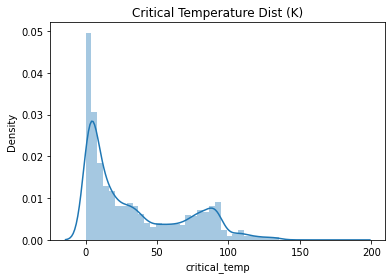

In [7]:
# EDA 

sns.distplot(dataset['critical_temp'])
plt.title("Critical Temperature Dist (K)")
plt.show()



In [8]:
# Feature selection (basic)
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression

y = dataset["critical_temp"]
x = dataset.iloc[:,0:dataset.shape[1]-1]
x.shape

lr = LinearRegression().fit(x,y)
model = SelectFromModel(lr, prefit=True)
x_new = model.transform(x)
x_new
# x_new.shape

array([[1.18179524, 1.30596704, 0.79148779, ..., 1.36892236, 1.06622103,
        0.43705882],
       [1.44930919, 1.54414454, 0.80707821, ..., 1.5571131 , 1.04722137,
        0.46860627],
       [1.18179524, 1.30596704, 0.77362019, ..., 1.36892236, 1.02917469,
        0.44469664],
       ...,
       [0.69084724, 0.68859367, 0.54211999, ..., 0.68696158, 0.45056121,
        0.4       ],
       [0.69084724, 0.68859367, 0.64887589, ..., 0.68696158, 0.57760119,
        0.46249324],
       [1.04127007, 1.09478408, 0.96877089, ..., 1.05492017, 0.97011578,
        1.5       ]])

In [9]:
# Lasso and Ridge Regression Implementation